#### tensorflow. 

In [2]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Conv1D,MaxPooling1D
from tensorflow.keras.datasets import imdb

import numpy
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
# seed값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# 학습셋, 테스트 셋 지정하기
(x_train,y_train),(x_test,y_test)= imdb.load_data(num_words=5000)

# 데이터 전처리
x_train = sequence.pad_sequences(x_train,maxlen=100)
x_test = sequence.pad_sequences(x_test,maxlen=100)

In [6]:
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
# n by n이 아니니까 마스클르 씌워서 convolution적용. 예) (2,1)
# 데이터의 필요없는 작업들을 제거하기 위해서 convolution을 적용하는 것
model.add(Conv1D(64,5,padding='valid', activation='relu', strides=1))
# pooling
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_2 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

Epoch 1/5
250/250 [==============================] - 23s 83ms/step - loss: 0.4496 - accuracy: 0.7706 - val_loss: 0.3670 - val_accuracy: 0.8380
Epoch 2/5
250/250 [==============================] - 23s 91ms/step - loss: 0.2952 - accuracy: 0.8752 - val_loss: 0.3325 - val_accuracy: 0.8550
Epoch 3/5
250/250 [==============================] - 20s 82ms/step - loss: 0.2555 - accuracy: 0.8944 - val_loss: 0.3340 - val_accuracy: 0.8562
Epoch 4/5
250/250 [==============================] - 22s 87ms/step - loss: 0.2167 - accuracy: 0.9130 - val_loss: 0.3303 - val_accuracy: 0.8558
Epoch 5/5
782/782 [==============================] - 11s 13ms/step - loss: 0.3562 - accuracy: 0.8531

 Test Accuracy: 0.8531


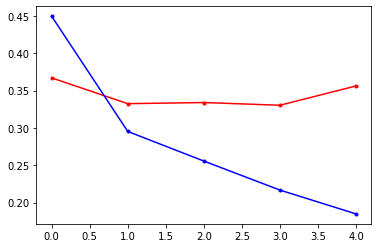

In [7]:
# 모델의 컴파일
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델의 실행
history = model.fit(x_train, y_train, batch_size=100, 
                    epochs=5, validation_data=(x_test,y_test))

# 테스트 정확도 출력
print('\n Test Accuracy: %.4f' % (model.evaluate(x_test,y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습 셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.',c='blue', label="Trainset_loss")

In [ ]:
# 그래프에 그리드를 주고 레이블을 표시 
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()